#### In this notebook we calculate the tidal, radiogenic, and total heating rates of all of the targets
Note that the equations used are also coded up in .py files under the 'Equations' folder

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [ ]:
ac.G

$H_{tidal}$ represents the amount of heat imparted to the planet by tidal sources. It is well represented by the energy dissipation ($\dot{E}$) and can be approximated as:

$H_{tidal} \approx \dot{E}$ = $\frac{21}{2}$$\frac{k_2 \omega^5 R_p^5 e^2}{GQ}$ where

k2 = degree 2 love number; describes how a planet responds to the tide raised on it by its primary (0=rigid, 1.5= fluid); typically assumed to be 0.3 for studies of terrestrial and icy worlds

$\omega$ = orbital period

Rp = planet radius

e = orbital eccentricity

G = gravitational constant

Q = quality factor (fraction of energy that is dissipated as heat in the interiors of planets); assumed to be 100 for tidal dissipation studies of moons in our SS

In [ ]:
ac.G #

In [ ]:
((1.11**5)*ac.R_earth)

In [ ]:
def h_tidal(p,r,e):
    k2 = 0.3  #(0=rigid, 1.5= fluid); typically assumed to be 0.3 for studies of terrestrial and icy worlds
    omega = (2*np.pi) / p
    Q = 100. #assumed to be 100 for tidal dissipation studies of moons in our SS
    h_tidal = (21/2) * ((k2 * omega**5 * ((r**5)*ac.R_earth) * e**2)/(ac.G * Q))
    return h_tidal

$H_{Radiogenic}$ is the total radiogenic heating rate of each planet. It depends on the mass of the planet mantle, which depnds on the volume of the mantle, and h.

$H_{Radiogenic} = \dot{h}M_{mantle}$ where:

$M_{mantle} = 0.84 * \frac{4}{3} \pi R_p^3 \rho_{mantle}$ and

$V_{mantle} = 0.84V_p = 0.84 * \frac{4}{3} \pi R_p^3 $

In [ ]:
def Mantle(r,m):
    volume = 0.84 * (4/3) * np.pi * (r*ac.R_earth)**3
    rho = m*ac.M_earth / volume
    Mantle = 0.84 * (4/3) * np.pi * (r*ac.R_earth)**3 * rho
    return Mantle

In [ ]:
def Mantle_Europa(r,m):
    Eu_volume = 0.69 * (4/3) * np.pi * (r*ac.R_earth)**3
    Eu_rho = m*ac.M_earth / Eu_volume
    Europa_Mantle = 0.69 * (4/3) * np.pi * (r*ac.R_earth)**3 * Eu_rho
    return Europa_Mantle

In [ ]:
def Mantle_Ganymede(r,m):
    G_volume = 0.4 * (4/3) * np.pi * (r*ac.R_earth)**3
    G_rho = m*ac.M_earth / G_volume
    Ganymede_Mantle = 0.4 * (4/3) * np.pi * (r*ac.R_earth)**3 * G_rho
    return Ganymede_Mantle

In [ ]:
def h_radio(Mantle):
    h = 1.59 * 10** -11 *u.W*u.kg**-1 
    h_radio = h * Mantle
    return h_radio

In [ ]:
h = 1.59 * 10** -11 *u.W*u.kg**-1 
h

In [ ]:
def h_total(h_tidal,h_radio):
    total = h_tidal + h_radio
    return (total)

Importing in the relevant list of candidates and confirmed planets

In [3]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temperature.csv')
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_targets.csv')
#'/Users/lupitatovar/Cool-Worlds/targets/confirmed_heating_rates.csv' has the calculated heating rates already!
#('/Users/lupitatovar/Cool-Worlds/targets/candidates_heating_rates.csv') has calcualted heating_rates for candidates

In [4]:
print(len(candidates))
print(len(confirmed))

47
14


In [ ]:
confirmed

In [5]:
period_conf = confirmed['period'].values      #[days]
radius_conf = confirmed['rade'].values        #[Earth radii]
mass_conf = confirmed['masse_est'].values     #[Earth mass, estimate using m/r relationship]
eccen_conf = confirmed['eccen'].values        #eccentricity

In [6]:
import sys  
sys.path.append('/Users/lupitatovar/Cool-Worlds/') #Edit this to your own file path
from heating_rates import *


In [ ]:
def h_tid(p,r,e):
    '''
    The equation that calculates the amount of heat imparted to the planet by tidal sources.
    '''
    #k2 is the degree2 love muber that describes how a planet responds to the tide raised on it by its primary
    #(0=rigid, 1.5= fluid); typically assumed to be 0.3 for studies of terrestrial and icy worlds

    k2 = 0.3

    # omega is the orbital period
    omega = (2*np.pi) / ((p*u.day).to(u.second))

    # Q is a quality factor; assumed to be 100 for tidal dissipation studies of moons in our SS
    Q = 100.

    h_tidal = ((21/2) * ((k2 * (omega**5) * ((r*ac.R_earth)**5) * (e**2)) / (ac.G * Q)))
    return h_tidal

In [7]:
#for T-1g  (p,r,e)
h_tidal(12.4,1.11,.026) #lynnae gets 5.77*10^11

<Quantity 3.93681715e+13 kg m2 / s3>

In [8]:
h_radio(1.11,1.34) #lynae gets 2.57*10^13

<Quantity 7.94086695e+13 W>

In [9]:
h_total(12.4,1.11,.026,1.34)

<Quantity 1.18776841e+14 kg m2 / s3>

Calculating heating rates for the planets with eccentricities

In [10]:
tidal_conf = []
radio_conf = []
htotal_conf = []

for i in range (0,len(confirmed)):
    tidal = h_tidal(period_conf[i],radius_conf[i],eccen_conf[i])
    radio = h_radio(radius_conf[i],mass_conf[i])
    htotal = h_total(period_conf[i],radius_conf[i],eccen_conf[i],mass_conf[i])
    
    tidal_conf = np.append(tidal_conf,tidal.value)
    radio_conf = np.append(radio_conf,radio.value)
    htotal_conf = np.append(htotal_conf,htotal.value)
    
    print (len(htotal_conf))

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [11]:
tidal_conf

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.04559696e+13, 0.00000000e+00, 0.00000000e+00, 4.47179722e+09,
       0.00000000e+00, 2.51520135e+09, 0.00000000e+00, 0.00000000e+00,
                  nan, 3.33175931e+12])

In [12]:
radio_conf

array([2.23978648e+14, 7.09736312e+13, 2.96621685e+14, 3.27460553e+14,
       3.38623036e+14, 4.26914060e+14, 2.09336095e+14, 1.51182584e+14,
       2.37825781e+14, 2.24026654e+14, 2.18938298e+14, 1.95941410e+14,
       1.48321643e+14, 8.69314766e+13])

In [13]:
htotal_conf

array([2.23978648e+14, 7.09736312e+13, 2.96621685e+14, 3.27460553e+14,
       3.59079005e+14, 4.26914060e+14, 2.09336095e+14, 1.51187056e+14,
       2.37825781e+14, 2.24029169e+14, 2.18938298e+14, 1.95941410e+14,
                  nan, 9.02632360e+13])

In [17]:
confirmed.insert(13,'H_Tidal',tidal_conf)

In [19]:
confirmed.insert(14,'H_Radio',radio_conf)

In [21]:
confirmed.insert(15,'H_Total',htotal_conf)

In [23]:
#confirmed.to_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_heating_rates.csv')

## Calculating Heating Rates for Candidates 

In [34]:
period_cand = candidates['Period'].values      #[days]
radius_cand = candidates['Radius'].values        #[Earth radii]
mass_cand = candidates['masse_est'].values     #[Earth mass, estimate using m/r relationship]

Since we do not have any eccentricity values for candidates we will draw from a distribution of eccentricities based on the work by: https://arxiv.org/pdf/1807.00549.pdf (Table 3 -- half gaussian values for single planets)

In [27]:
print(len(candidates))

47


In [28]:
#generating random eccentricities
from scipy.stats import halfnorm
e = halfnorm.rvs(size=47,scale=.32)

In [31]:
print(len(e))

47


(array([1.45364152, 2.66500945, 1.45364152, 1.6959151 , 1.45364152,
        0.72682076, 0.72682076, 0.24227359, 0.72682076, 0.24227359]),
 array([0.00381686, 0.09163739, 0.17945793, 0.26727846, 0.355099  ,
        0.44291953, 0.53074007, 0.6185606 , 0.70638113, 0.79420167,
        0.8820222 ]),
 [<matplotlib.patches.Polygon at 0x7f9a508079d0>])

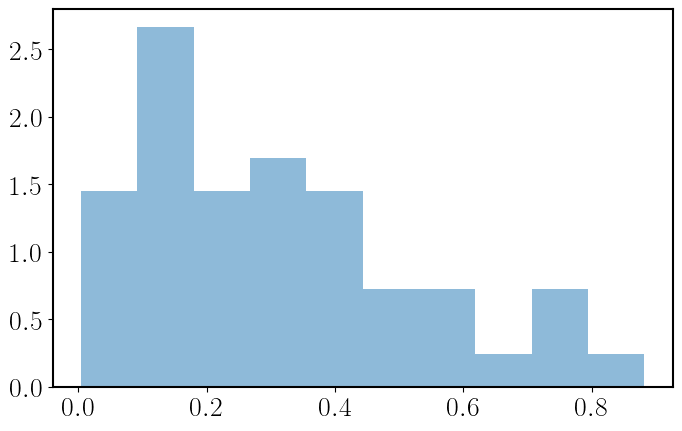

In [30]:
plt.hist(e, density=True, histtype='stepfilled', alpha=0.5)

In [39]:
h_total(period_conf[1],radius_conf[1],eccen_conf[1],mass_conf[1])

<Quantity 7.09736312e+13 kg m2 / s3>

In [40]:
print(period_conf[1])
print(radius_conf[1])
print(eccen_conf[1])
print(mass_conf[1])

19.53527
1.069217391
0.0
1.2353153228798293


In [60]:
float(candidates['Period'].values[1])

384.6961

In [49]:
print(period_cand)
#print(radius_cand)
#print(e[1])
#print(mass_cand[1])

[' 147.661729' ' 384.6961' ' 483.36405' ' 449.01499' ' 651.07431'
 ' 371.56492' ' 550.86514' ' 370.05918' ' 415.748785' ' 383.26217'
 ' 318.25858' ' 631.99116' ' 425.593391' ' 578.21623' ' 189.961729'
 ' 535.1515' ' 441.61919' ' 388.67155' ' 641.60204' ' 297.78282'
 ' 365.739893' ' 570.01886' ' 545.205601' ' 398.51312' ' 559.785594'
 ' 493.30572' ' 364.18129' ' 132.114' ' 405.6296' ' 486.12702'
 ' 455.27405' ' 326.6708' ' 392.50115' ' 569.45051' ' 328.32211'
 ' 578.88761' ' 331.55459' ' 395.13138' ' 400.11482' ' 302.34971'
 ' 432.96905' ' 13.284219' ' 24.213117' ' 19.2879717386223' ' NaN' ' NaN'
 ' 703.79367004987']


In [61]:
h_total(float(period_cand[1]),radius_cand[1],e[1],mass_cand[1])

<Quantity 3.85831128e+14 kg m2 / s3>

In [62]:
tidal_cand = []
radio_cand = []
htotal_cand = []

for i in range (0,len(candidates)):
    tidal2 = h_tidal(float(period_cand[i]),radius_cand[i],e[i])
    radio2 = h_radio(radius_cand[i],mass_cand[i])
    htotal2 = h_total(float(period_cand[i]),radius_cand[i],e[i],mass_cand[i])
    
    tidal_cand = np.append(tidal_cand,tidal2.value)
    radio_cand = np.append(radio_cand,radio2.value)
    htotal_cand = np.append(htotal_cand,htotal2.value)
    
    print (len(htotal_cand))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [65]:
print(len(radio_cand))

47


In [66]:
candidates

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,name,Insolation,Period,T_eff,Radius,Discovery,st_log_lum,semi_au,masse_est,hostname
0,0,0,0,KOI-4427.01,0.318849,147.661729,199.239771,1.797673,Kepler,-1.195000,0.447412,3.885904,KIC 4172805
1,1,1,1,KOI-4848.01,0.160519,384.6961,167.826873,1.880000,Kepler,-0.883000,0.903101,4.192848,KIC 9005321
2,2,2,2,KOI-7716.01,0.434274,483.36405,215.238883,1.503482,Kepler,-0.238000,1.153766,2.868943,KIC 5097856
3,3,3,3,KOI-4878.01,0.933017,449.01499,260.586565,1.020524,Kepler,0.083000,1.139083,1.045258,KIC 11804437
4,4,4,4,KOI-5087.01,0.332875,651.07431,201.395598,1.141911,Kepler,-0.160000,1.441648,1.563745,KIC 4770798
5,5,5,5,KOI-5227.01,0.598983,371.56492,233.256197,1.611944,Kepler,-0.251000,0.967816,3.229114,KIC 6034834
6,6,6,6,KOI-5236.01,0.811569,550.86514,251.658130,1.921435,Kepler,0.160000,1.334558,4.350944,KIC 6067545
7,7,7,7,KOI-5130.01,0.430720,370.05918,214.797110,1.900000,Kepler,-0.420683,0.938774,4.268858,KIC 5166811
8,8,8,8,KOI-5408.01,0.354582,415.748785,204.601495,1.710821,Kepler,-0.421000,1.034289,3.572556,KIC 7631138
9,9,9,9,KOI-5789.01,0.319386,383.26217,199.323573,1.532865,Kepler,-0.545000,0.944805,2.964783,KIC 10387792


In [68]:
candidates.insert(13,'H_Tidal',tidal_cand)
candidates.insert(14,'H_Radio',radio_cand)
candidates.insert(15,'H_Total',htotal_cand)

In [69]:
candidates

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,name,Insolation,Period,T_eff,Radius,Discovery,st_log_lum,semi_au,masse_est,hostname,H_Tidal,H_Radio,H_Total
0,0,0,0,KOI-4427.01,0.318849,147.661729,199.239771,1.797673,Kepler,-1.195000,0.447412,3.885904,KIC 4172805,4.269050e+10,3.373117e+14,3.373544e+14
1,1,1,1,KOI-4848.01,0.160519,384.6961,167.826873,1.880000,Kepler,-0.883000,0.903101,4.192848,KIC 9005321,2.197108e+10,3.858092e+14,3.858311e+14
2,2,2,2,KOI-7716.01,0.434274,483.36405,215.238883,1.503482,Kepler,-0.238000,1.153766,2.868943,KIC 5097856,4.704759e+08,1.973302e+14,1.973307e+14
3,3,3,3,KOI-4878.01,0.933017,449.01499,260.586565,1.020524,Kepler,0.083000,1.139083,1.045258,KIC 11804437,1.514369e+07,6.171192e+13,6.171194e+13
4,4,4,4,KOI-5087.01,0.332875,651.07431,201.395598,1.141911,Kepler,-0.160000,1.441648,1.563745,KIC 4770798,1.584473e+07,8.645616e+13,8.645618e+13
5,5,5,5,KOI-5227.01,0.598983,371.56492,233.256197,1.611944,Kepler,-0.251000,0.967816,3.229114,KIC 6034834,2.518710e+09,2.431919e+14,2.431945e+14
6,6,6,6,KOI-5236.01,0.811569,550.86514,251.658130,1.921435,Kepler,0.160000,1.334558,4.350944,KIC 6067545,6.994064e+08,4.118851e+14,4.118858e+14
7,7,7,7,KOI-5130.01,0.430720,370.05918,214.797110,1.900000,Kepler,-0.420683,0.938774,4.268858,KIC 5166811,1.127595e+09,3.982537e+14,3.982548e+14
8,8,8,8,KOI-5408.01,0.354582,415.748785,204.601495,1.710821,Kepler,-0.421000,1.034289,3.572556,KIC 7631138,3.826753e+08,2.907455e+14,2.907459e+14
9,9,9,9,KOI-5789.01,0.319386,383.26217,199.323573,1.532865,Kepler,-0.545000,0.944805,2.964783,KIC 10387792,5.560228e+08,2.091271e+14,2.091277e+14


In [70]:
#candidates.to_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_heating_rates.csv')